In [1]:
# Google drive로 Mount

from google.colab import drive
drive.mount('/content/drive/')
# 폴더 이동
%cd '/content/drive/My Drive/hanhwa_AA/' #수정 필요

! pip install EMD-signal

Mounted at /content/drive/
/content/drive/My Drive/hanhwa_AA
     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 81 kB 9.8 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 


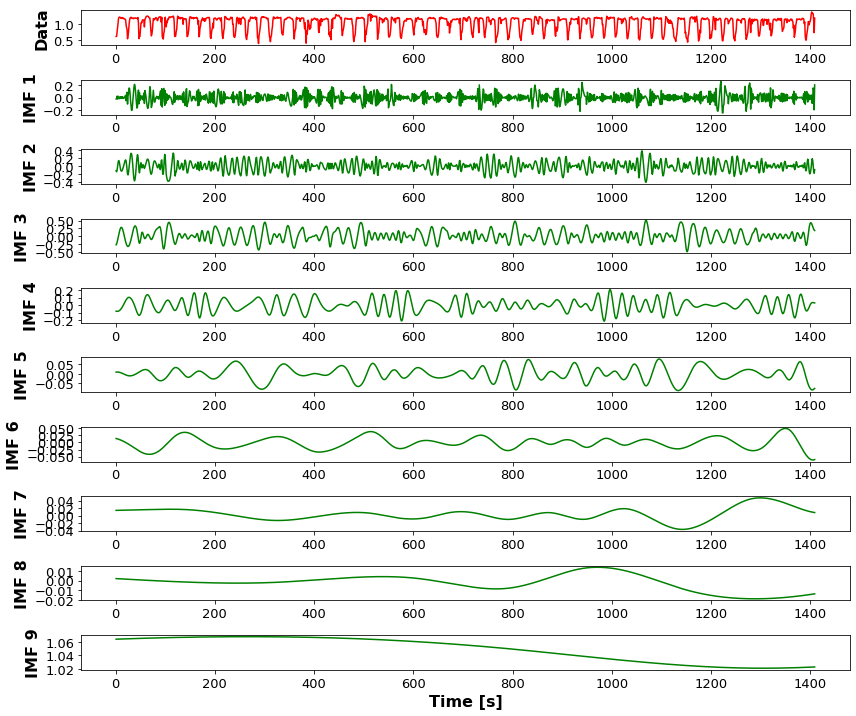

In [7]:
import numpy as np
import pandas as pd
import pylab as plt
from PyEMD import EMD

# data loading

df_x = pd.read_excel('data.xlsx', header=None)
df_x.shape

array_x = df_x.to_numpy()

array_x.shape, type(array_x)

new_array_x = array_x.flatten()
new_array_x.shape

t = np.arange(1, len(new_array_x)+1, 1)
t.shape

emd = EMD()
IMFs = emd.emd(new_array_x, t)

IMFs.shape

N = IMFs.shape[0]

# Plot results
plt.figure(figsize=(12, 10))
plt.subplot(N + 1, 1, 1)
plt.plot(t, new_array_x, 'r')
plt.ylabel("Data", fontsize=16, weight='bold', fontname='Times new roman')
plt.yticks(fontsize=13, fontname='Times new roman')
plt.xticks(fontsize=13, fontname='Times new roman')

for n in range(N):
    plt.subplot(N + 1, 1, n + 2)
    plt.plot(t, IMFs[n], 'g')
    plt.ylabel("IMF %i" % (n + 1), fontsize=16, weight='bold', fontname='Times new roman')
    plt.yticks(fontsize=13, fontname='Times new roman')
    plt.xticks(fontsize=13, fontname='Times new roman')
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]", fontsize=16, weight='bold', fontname='Times new roman')
plt.tight_layout()
plt.show()



IMFs_df = pd.DataFrame(IMFs)

IMFs_df.to_csv("IMF.csv",index=False)
